In [1]:
import pandas as pd # Initially to just simply load/read the csv we need pandas
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# Assign data to df const
df = pd.read_csv('../Datasets/Combined_Dataset.csv')
df.head()

,State,Cov_Ent_Type,Individuals_Affected,Type_of_Breach,Loc_of_Breached_Information,Business_Associate_Present
0,CO,Healthcare Provider,26609.0,Hacking/IT Incident,Email,No
1,WI,Healthcare Provider,907.0,Unauthorized Access/Disclosure,Email,No
2,NH,Healthcare Provider,34878.0,Hacking/IT Incident,Network Server,No
3,CA,Healthcare Provider,500.0,Theft,Paper/Films,No
4,OH,Healthcare Provider,2716.0,Hacking/IT Incident,"Laptop, Network Server",No


In [4]:
Unique_State_List = df['State'].unique()
Covered_Entity_Unique_Vals = df['Cov_Ent_Type'].unique()
Ind_Affected_Mean = df['Individuals_Affected'].mean()
Unique_Breach_Type = df['Type_of_Breach'].unique()
Unique_Breached_Info = df['Loc_of_Breached_Information'].unique()
print('Individuals Affected Mean:'+ str(Ind_Affected_Mean))
print(Covered_Entity_Unique_Vals)

Individuals Affected Mean:71188.04179678117
['Healthcare Provider' 'Business Associate' 'Health Plan'
 'Healthcare Clearing House' nan]


In [2]:
# Only visualizes with numerical data. Isn't the best representation intially for this dataset
df.describe()

,Individuals_Affected
count,4.163000e+03
mean,7.118804e+04
std,1.290246e+06
min,5.000000e+02
25%,1.031000e+03
50%,2.739000e+03
75%,1.004100e+04
max,7.880000e+07


In [5]:
df.groupby('State')\
    .Business_Associate_Present.count()\
    .reset_index()

,State,Business_Associate_Present
0,AK,17
1,AL,46
2,AR,57
3,AZ,79
4,CA,425
5,CO,79
6,CT,74
7,DC,23
8,DE,21
9,FL,268


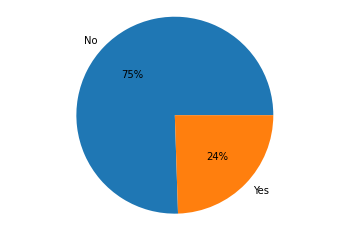

In [6]:
BA_column_analysis = df.groupby('Business_Associate_Present')\
    .State.count()
plt.pie(BA_column_analysis.values, labels = BA_column_analysis.index, autopct='%d%%')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Business_Associate_Present', ylabel='count'>

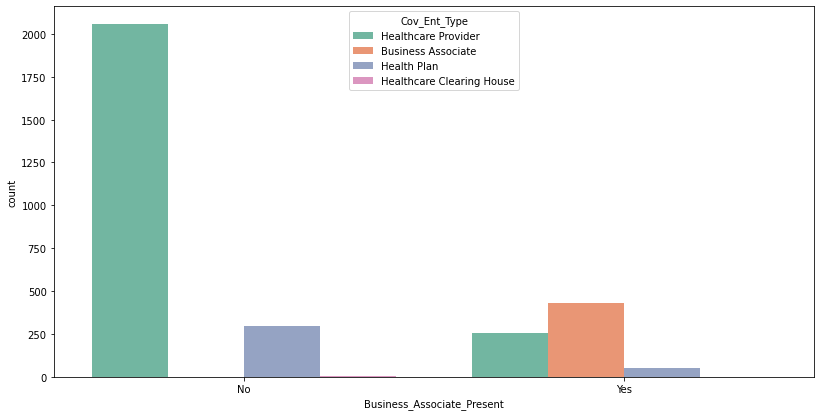

In [14]:
# Covered Entity Type vs. Business Associated Present
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
sns.countplot(df['Business_Associate_Present'], hue=df['Cov_Ent_Type'],palette='Set2')

<AxesSubplot:>

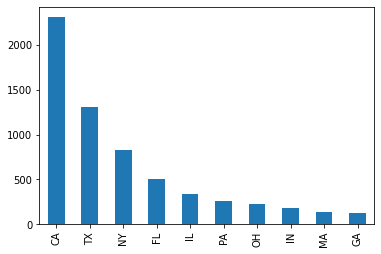

In [15]:
# I want to understanding each column and their unique value_counts
Location_of_Breached_Information = df['Loc_of_Breached_Information'].value_counts().nlargest(10) # Adding .nlargest() to the end of this dataset as I want to be able to understand better the top attributes associated with this features. In this case the top 5
# print(Location_of_Breached_Information)
Location_of_Breached_Information.plot.bar() # Adding in visualization as I want to be able to see the data
Breach_Type = df['Type_of_Breach'].value_counts().nlargest(5)
# print(Breach_Type)
Breach_Type.plot.bar()
Covered_Entity_Type = df['Cov_Ent_Type'].value_counts()
# print(Covered_Entity_Type)
Covered_Entity_Type.plot.bar()
State = df.State.value_counts().nlargest(10)
# print(State)
State.plot.bar()

<AxesSubplot:ylabel='Type_of_Breach'>

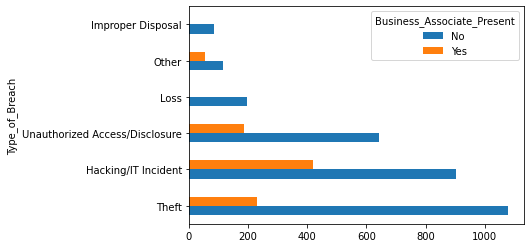

In [27]:
# Utilizing the groupby function to compare categroical features
business_Count = df['Business_Associate_Present'].value_counts()
# df.groupby('Business_Associate_Present').Cov_Ent_Type.value_counts().unstack(0).plot.barh()
df.groupby('Business_Associate_Present').Type_of_Breach.value_counts().nlargest(10).unstack(0).plot.barh()